## BACKGROUND

This Capstone project is performed to fulfill the requirements of DATA SCIENCE AND AI Graduate Certification Course by Institute of Data in conjunction with University of Sydney. This project should only be concieve as support in educational illustration. 

Data for this projects are generated using Google API, Google Maps and WebSrapping to understand Customer Experience Sentiment across the following retail category of Secvice Industry. 
:
    1. Car Dealerships 
    2. Bunnings 
    3. Coles
    4. McDonalds
    5. Kmart
    
A total of 150-300 organizations in each category (with unique Google Ids) across Australia are randomly selected. Also, these reviews are mostly less than 8 months old and likely to represent post pandamic environment. 



## OBJECTIVE OF THIS PROJECT

1. Understand overall Customer Experience Sentiment in 5 Retail Sectors by measuring NPS Score

2. Establish a model to accurately predict to rate customer's reviews along with subjectivity and polarity

3. Use Machine learning to Re-direct these reviews to relevant department of concern there by significantly reducing response time and staffing cost. 

#### Considerations & Assumptions: 

Net Promotor Score(NPS) is industry standard to measure customer satisfaction which ultimately enhances or destroys brand image and business growth respectvely. 

It is caulucated as by substracting percentage of decrators from percentage of Promotors. In a scale of 10, Rating of 0-6 are detractors, Rating 7-8 are passives and Rating of 9-10 are promoters. 

Important Note here to take is Passive Scores are not taken into consideration to calulate NPS. Hence, NPS becomes measurement of two extremes. 

In this excercise we have scaled down to 1-5 scale where rating of 1-2 are Detractors, Rating of 3-4 are Passives and Rating of 5 are promotors.


Rating 1-2: Unhappy customers who can damage brand and hinder growth through negative word-of-mouth

Rating 3-4: Just marginally satisfied customer but unwilling/inactive customers. These can swing either way with their comments.

Rating 5: Loyal customers with positive words of mouth and brings more revenue by referring others.

Bain & Company,who developed this widely used NPS, suggests the following:

Above 0 is good,
Above 20 is favorable,
Above 50 is excellent, and
Above 80 is world class.


## LIBRARIES USED

In [1]:
# GENERAL LIBRARIES
import pandas as pd
import numpy as np


# FOR VIZUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud


# FOR CLEANING 
import neattext as nt
import neattext.functions as nfx
import regex as re


# FOR TOKENIZING
from collections import Counter


# FOR SENTIMENT ANALYSIS & Vectorizer for NLP
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
# import Word2Vec


# MODELLING & EVALUATION PACKAGES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix

#CROSS VALIDATION
from sklearn.model_selection import cross_val_score

#MACHINE LEARNING
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




from tensorflow import keras


# INTERPRETATION
import eli5


# SAVING THE MODEL
import joblib

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

## RAW DATASET

As mentioned earlier, the following dataset is merged product of 5 indivdual datasets from 5 retail sectors. Each data set contains at least 1000 reviews. These reviews are extracted from strach using Google reviews. 

In [3]:
df = pd.read_csv("Google_Reviews.csv")

#### PRELIMINARY ASSESSMENT OF DATASET

In [4]:
df.head()

,Unnamed: 0,Rating,Reviews
0,0,2,Usually misses something from the order.
1,1,5,"Nice McDonald's, great play space for kids of ..."
2,2,1,"Really bad service,\nI went through there driv..."
3,3,5,Has a Bit of long wait but over all its one th...
4,4,4,Smaller store compared to the others but very ...


In [5]:
df["Rating"].value_counts()

5    4118
4    1625
1     813
3     597
2     327
Name: Rating, dtype: int64

In [6]:
df.shape

(7480, 3)

In [7]:
df.isnull().sum()

Unnamed: 0     0
Rating         0
Reviews       70
dtype: int64

There are 70 rows where customers did not put reviews. Hence these 70 rows doesnt provide any valuable insight to NLP. 

For this reason we are dropping all the null reviews and unwanted columns. This drop is less than 1% from overall dataset.

In [8]:
df = df.dropna()

In [9]:
df.drop(["Unnamed: 0"], axis=1, inplace = True)

#### THIS IS HOW FINAL DATAFRAME LOOKS LIKE

In [10]:
df.head()

,Rating,Reviews
0,2,Usually misses something from the order.
1,5,"Nice McDonald's, great play space for kids of ..."
2,1,"Really bad service,\nI went through there driv..."
3,5,Has a Bit of long wait but over all its one th...
4,4,Smaller store compared to the others but very ...


In [11]:
df.describe()

,Rating
count,7410.000000
mean,4.054791
std,1.335670
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7410 entries, 0 to 7479
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   7410 non-null   int64 
 1   Reviews  7410 non-null   object
dtypes: int64(1), object(1)
memory usage: 173.7+ KB


##### Total Count by Ratings 

In [13]:
df["Rating"].value_counts()

5    4072
4    1615
1     808
3     588
2     327
Name: Rating, dtype: int64

#### PLOT TOTAL COUNTS BY RATING

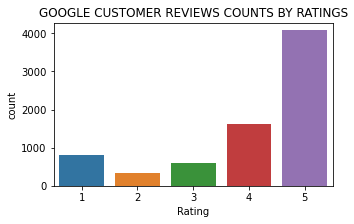

In [14]:
plt.figure(figsize = (5,3))
sns.countplot(df["Rating"])
plt.title("GOOGLE CUSTOMER REVIEWS COUNTS BY RATINGS")
plt.show()

#### OVERALL NPS SCORE

In [15]:
print("-"*50)

promoters_percent = len(df[df["Rating"]==5]) / len(df["Rating"])*100
print("Promoters Percentage :  ",promoters_percent)

passive_percent = (len(df[df["Rating"]==3]) + len(df[df["Rating"]==4])) / len(df["Rating"])*100
print("Passive Percentage :  ",passive_percent)

detractors_percent = (len(df[df["Rating"]==1]) + len(df[df["Rating"]==2])) / len(df["Rating"])*100
print("Detractors Percentage :  ",detractors_percent)

print("-"*50)

nps = promoters_percent - detractors_percent
print("Net Promoter Score : ", nps)
print("-"*50)

print("(Above 0 is good, Above 20 is favorable, Above 50 is excellent, and Above 80 is world class)")

--------------------------------------------------
Promoters Percentage :   54.952766531713905
Passive Percentage :   29.730094466936574
Detractors Percentage :   15.317139001349528
--------------------------------------------------
Net Promoter Score :  39.635627530364374
--------------------------------------------------
(Above 0 is good, Above 20 is favorable, Above 50 is excellent, and Above 80 is world class)


So far, we have known that NPS score based on Consumers Rating is between favorable and excellent. In order to move towards "excellent" bracket the following issues are to be addressed. 


    1. Identify Customer concerns by analysing Rating 1 & 2  (ie. develop strategies to minimizes detractors)
    
    2. Develop futher plan to convert passives to promoters (i.e Convert Passive to active participation)
    
    3. What are good things of service that Promoters are promoting?(i.e plans to develop customer retention)
    
Further EDA is to analyze words in each Rating class. This will also help answer above questions and also contribute in developing predcitve modeling. 

### FURTHER EDA

In [16]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', str(text))
    # remove double quotes
    text = re.sub(r'[",.'':;?/]+', '', str(text))

    return text

In [17]:
df["Review_List"] = df["Reviews"].apply(clean_text)


In [18]:
df["Review_List"] = df["Review_List"].to_list()

In [19]:
df.sample(5)

,Rating,Reviews,Review_List
5309,5,"Always pleasant staff, wide aisles, interestin...",Always pleasant staff wide aisles interesting ...
6486,1,"Unprofessional service attitude, once you rais...",Unprofessional service attitude once you raise...
5502,5,Good variety. Great service. All you can ask f...,Good variety Great service All you can ask for...
576,5,Nina is an exceptional employee she was nice a...,Nina is an exceptional employee she was nice a...
1350,5,"Clean store, nice staff who were helpful, sani...",Clean store nice staff who were helpful saniti...


# CLEANING TEXT USING NEAT-TEXT FUNCTION

#### Neat-Text Directory

In [20]:
# dir(nfx)

In [21]:
df["clean_text"] = df["Review_List"].apply(nfx.remove_special_characters)

In [22]:
df["clean_text"] = df["clean_text"].apply(nfx.remove_punctuations)

In [23]:
df["clean_text"] = df["clean_text"].apply(nfx.remove_hashtags)

In [24]:
df["clean_text"] = df["clean_text"].apply(nfx.remove_emojis)

In [25]:
df["clean_text"] = df["clean_text"].apply(nfx.remove_stopwords)

In [26]:
df["clean_text"] = df["clean_text"].replace(r'^\s*$', np.nan, regex=True)

In [27]:
df["clean_text"] = df["clean_text"].astype(str)

# KEYWORDS & TOKENS EXTRACTION FROM EACH RATING 

In [28]:
rating_list = df["Rating"].unique().tolist()

### FUNCTION TO PLOT  - COUNT KEYWORDS 

In [29]:
def get_keywords(text, num=50000):
    tokens = [tok for tok in text.split()]
    most_frequent_tokens = Counter(tokens).most_common(num)
    return dict(most_frequent_tokens)

### FUNCTION TO PLOT - KEYWORDS 

In [30]:
def plot_keywords(rating_dict):
    plot_df = pd.DataFrame(rating_dict.items(),columns = ["Tokens", "Count"])
    plt.figure(figsize = (15,12))
    sns.barplot(x = "Tokens", y="Count", data = plot_df)
    plt.xticks(rotation = 25)
    plt.show()

### FUNCTION TO PLOT - WORD CLOUD 

In [31]:
def plot_wordcloud(words):
    plot_wordcloud = WordCloud().generate(words)
    plt.figure(figsize=(20,15))
    plt.imshow(plot_wordcloud, interpolation ='bilinear')
    plt.axis('on')
    plt.show()

### Dataframe Keywords

This will be used for LSTM - Machine Learning Prediction as num_words

In [32]:
reviews = df["clean_text"].tolist()
reviews_combined = ''.join(reviews)
reviews_keywords = get_keywords(reviews_combined)
# print("Total Tokens : ", len(reviews_keywords))
# print("-"*50)
# reviews_keywords

### Rating 1 Keywords

In [33]:
rating_1_reviews = df[df["Rating"]==1]["clean_text"].tolist()
rating_1_reviews_combined = ''.join(rating_1_reviews)
rating_1_keywords = get_keywords(rating_1_reviews_combined)
# rating_1_keywords

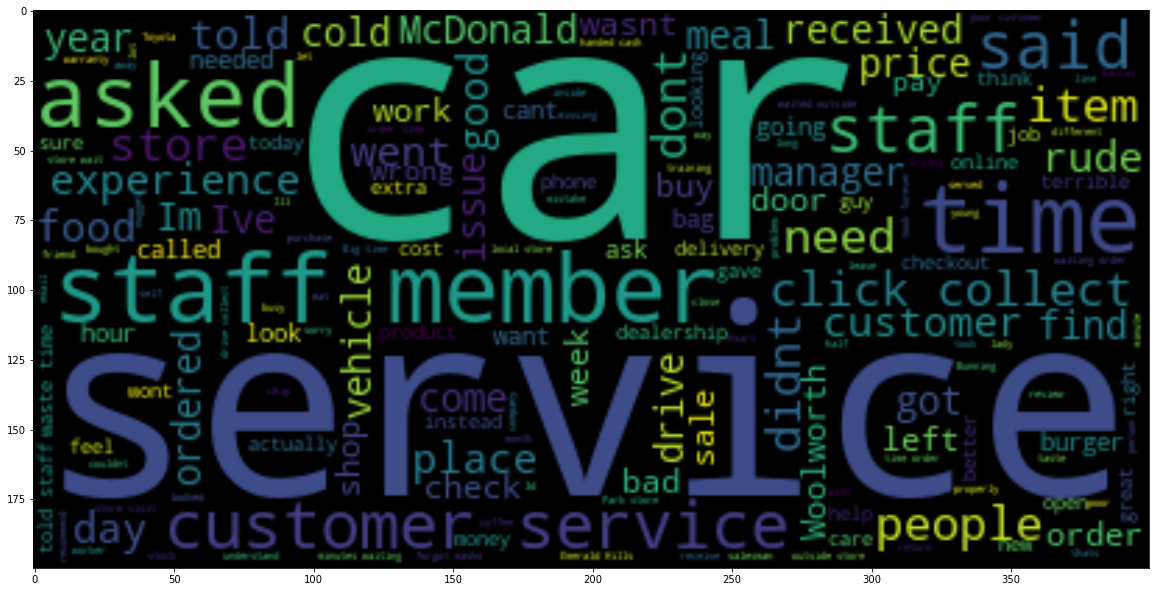

In [34]:
plot_wordcloud(rating_1_reviews_combined)

In [35]:
# plot_keywords(rating_1_keywords)

### Rating 2 Keywords

In [36]:
rating_2_reviews = df[df["Rating"]==2]["clean_text"].tolist()
rating_2_reviews_combined = ''.join(rating_2_reviews)
rating_2_keywords = get_keywords(rating_2_reviews_combined)
# rating_2_keywords

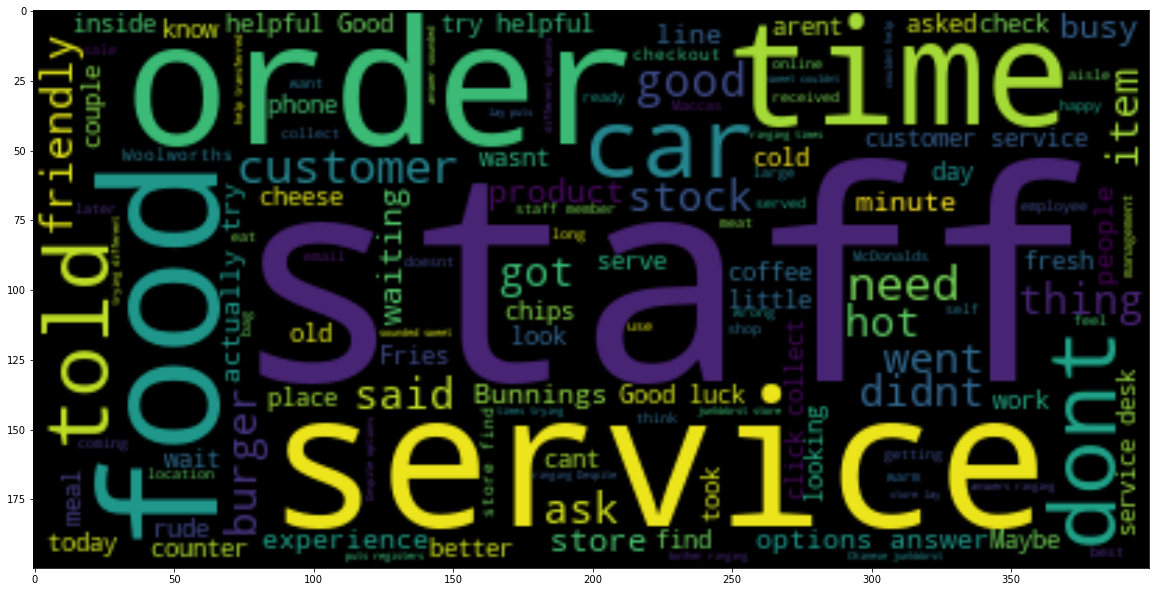

In [37]:
plot_wordcloud(rating_2_reviews_combined)

### Rating 3 Keywords

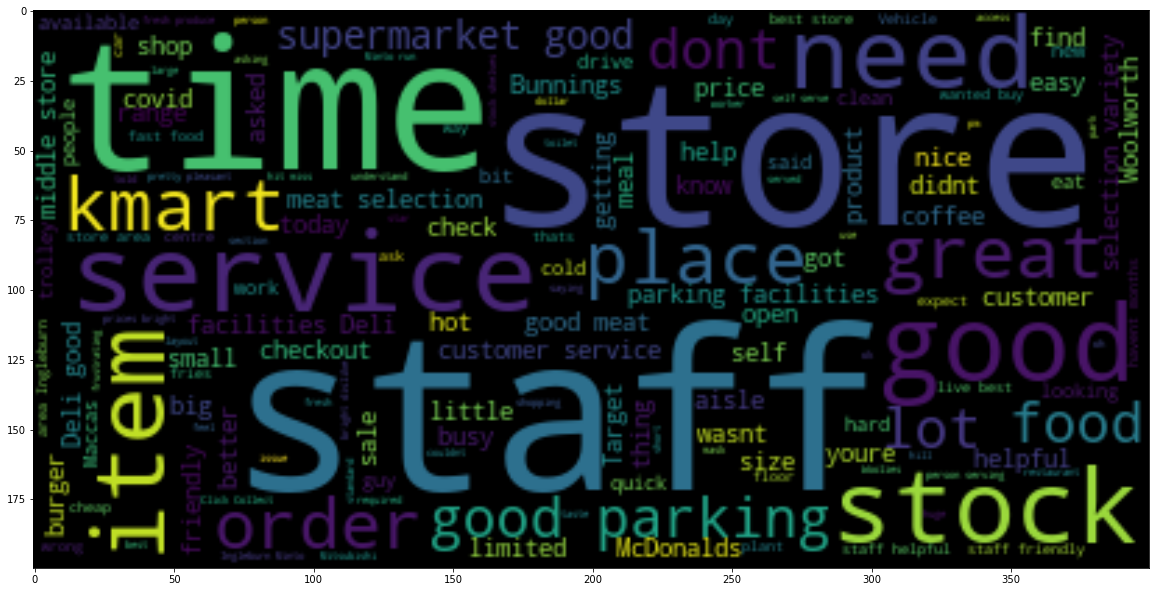

In [38]:
rating_3_reviews = df[df["Rating"]==3]["clean_text"].tolist()
rating_3_reviews_combined = ''.join(rating_3_reviews)
rating_3_keywords = get_keywords(rating_3_reviews_combined)

# rating_3_keywords
plot_wordcloud(rating_3_reviews_combined)

### Rating 4 Keywords

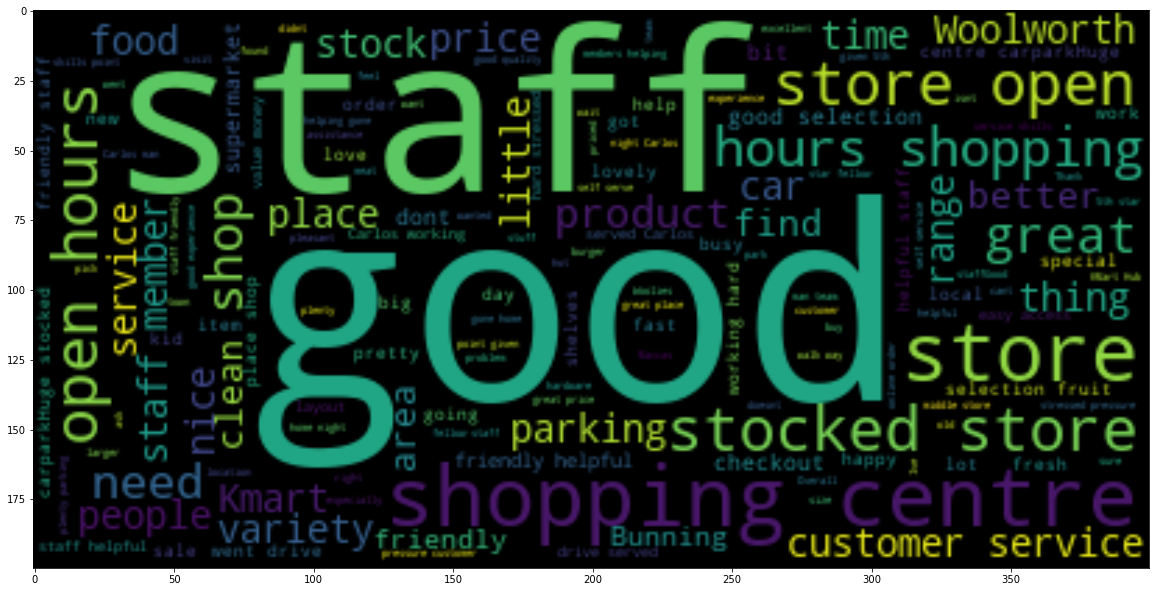

In [39]:
rating_4_reviews = df[df["Rating"]==4]["clean_text"].tolist()
rating_4_reviews_combined = ''.join(rating_4_reviews)
rating_4_keywords = get_keywords(rating_4_reviews_combined)
# rating_4_keywords
plot_wordcloud(rating_4_reviews_combined)

### Rating 5 Keywords

In [40]:
rating_5_reviews = df[df["Rating"]==5]["clean_text"].tolist()
rating_5_reviews_combined = ''.join(rating_5_reviews)
rating_5_keywords = get_keywords(rating_5_reviews_combined)
# rating_4_keywords

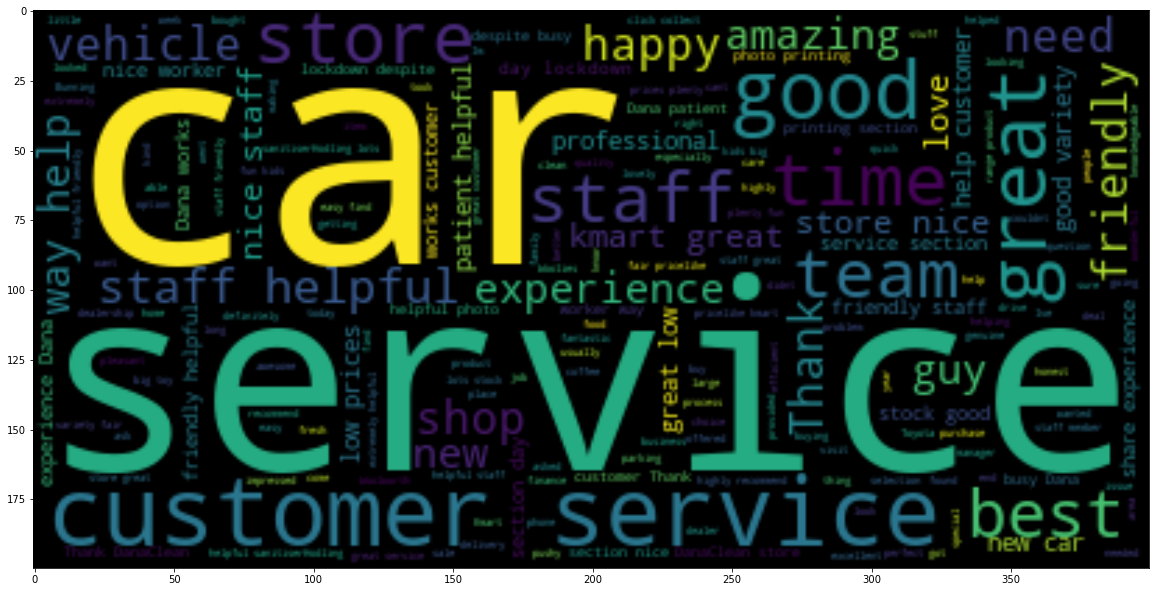

In [41]:
plot_wordcloud(rating_5_reviews_combined)

In [42]:
# plot_keywords(rating_5_keywords)

## SENTIMENT ANALYSIS (SUBJECTIVITY AND PORALITY) USING TEXTBLOB FUNCTION


SUBJECTIVITY 

Textblob analyzes a review on the basis of its subjectivity. subjectivity is measured between 0 and 1. Higher subjectivity means the review is more a opinion than a objective (facts).

POLARITY

Polarity captures positve and negative emotion in a text. Higher Polarity means positive where as lower polarity means negative.
    


In [43]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', 1)

In [44]:
def getSScore(text):
    return TextBlob(text).sentiment.subjectivity

def getPScore(text):
    return TextBlob(text).sentiment.polarity

df["Sub_Score"] = df["clean_text"].apply(getSScore)
df["Pol_Score"] = df["clean_text"].apply(getPScore)

In [45]:
df["Pol_Score"].corr(df["Rating"])

0.5107506484753024

In [46]:
df.corr()

,Rating,Sub_Score,Pol_Score
Rating,1.000000,0.180591,0.510751
Sub_Score,0.180591,1.000000,0.474421
Pol_Score,0.510751,0.474421,1.000000


In [47]:
print("Mean Subjectivity and Polarity")
print("*"*50)


df_blob_1 = df.loc[df["Rating"]==1][["Sub_Score", "Pol_Score"]]
print("Rating 1 Sub_score: ", df_blob_1["Sub_Score"].mean())
print("Rating 1 Pol_score: ", df_blob_1["Pol_Score"].mean())
print("-"*50)


df_blob_2 = df.loc[df["Rating"]==2][["Sub_Score", "Pol_Score"]]
print("Rating 2 Sub_score: ", df_blob_2["Sub_Score"].mean())
print("Rating 2 Pol_score: ", df_blob_2["Pol_Score"].mean())
print("-"*50)

df_blob_3 = df.loc[df["Rating"]==3][["Sub_Score", "Pol_Score"]]
print("Rating 3 Sub_score: ", df_blob_3["Sub_Score"].mean())
print("Rating 3 Pol_score: ", df_blob_3["Pol_Score"].mean())
print("-"*50)

df_blob_4 = df.loc[df["Rating"]==4][["Sub_Score", "Pol_Score"]]
print("Rating 4 Sub_score: ", df_blob_4["Sub_Score"].mean())
print("Rating 4 Pol_score: ", df_blob_4["Pol_Score"].mean())
print("-"*50)

df_blob_5 = df.loc[df["Rating"]==5][["Sub_Score", "Pol_Score"]]
print("Rating 5 Sub_score: ", df_blob_5["Sub_Score"].mean())
print("Rating 5 Pol_score: ", df_blob_5["Pol_Score"].mean())
print("-"*50)


Mean Subjectivity and Polarity
**************************************************
Rating 1 Sub_score:  0.5003506682481954
Rating 1 Pol_score:  -0.04044749695854713
--------------------------------------------------
Rating 2 Sub_score:  0.4723010557759154
Rating 2 Pol_score:  0.11016417255988363
--------------------------------------------------
Rating 3 Sub_score:  0.45643615123471104
Rating 3 Pol_score:  0.2007176436170911
--------------------------------------------------
Rating 4 Sub_score:  0.5526990470631152
Rating 4 Pol_score:  0.31542012740249326
--------------------------------------------------
Rating 5 Sub_score:  0.5932839204555829
Rating 5 Pol_score:  0.4114285202649297
--------------------------------------------------


In [48]:
df.to_csv("captsone_part1.csv")

The above File is now saved as Capstone_part1.csv. This will be used in Part 2 of the Capstone Project. 